In [12]:
import pandas as pd
import seaborn as sns

In [7]:
df_data = pd.read_csv("../dataset_example/antiviral.csv")
df_data.head(5)

,sequence,half_life_seconds,experimental_characteristics,hl_category
0,AAAMSQVTN,15840.0,Mammalian,Medium
1,AACEVAKNLNESLIDLQELGKYEQYIKW,15840.0,Mammalian,Medium
2,AAGAVVNDL,15840.0,Mammalian,Medium
3,AAHLIDALYAEFLGGRVLTT,15840.0,Mammalian,Medium
4,AAHLIDALYAEFLGGRVLTTPVVHRALFYASAVLRQPFLAGVPSA,15840.0,Mammalian,Medium


In [8]:
df_data.columns = ['sequence', 'half_life_seconds', 'organism', 'hl_category']

In [9]:
df_data["lenght"] = df_data["sequence"].str.len()
df_data["lenght"].describe()

count    2268.000000
mean       18.463845
std         9.658712
min         2.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        88.000000
Name: lenght, dtype: float64

In [10]:
df_data = df_data[(df_data["lenght"]>=5) & (df_data["lenght"]<50)]
df_data.shape

(2219, 5)

In [11]:
df_data["organism"].value_counts()

Mammalian    1125
Yeast         628
E_coli        466
Name: organism, dtype: int64

<Axes: xlabel='half_life_seconds', ylabel='hl_category'>

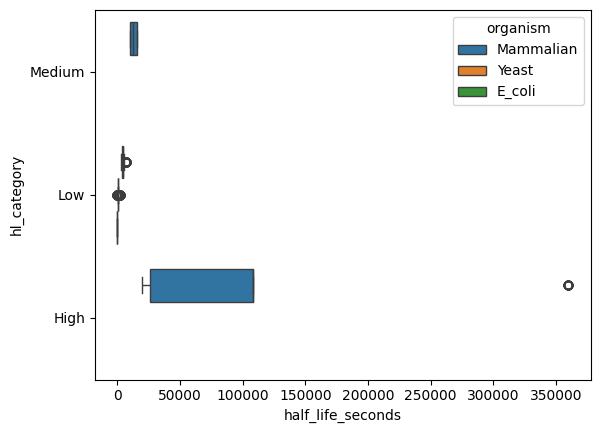

In [16]:
sns.boxplot(data=df_data, x="half_life_seconds", y="hl_category", hue="organism")

In [17]:
df_data.groupby(by=["hl_category", "organism"]).count()

sequence  half_life_seconds  lenght
hl_category organism                                      
High        Mammalian       376                376     376
Low         E_coli          466                466     466
            Mammalian       492                492     492
            Yeast           628                628     628
Medium      Mammalian       257                257     257

In [18]:
df_data_class = df_data[["sequence", "hl_category"]]
df_data_class.to_csv("../dataset_example/data_for_classification.csv", index=False)

In [19]:
df_low = df_data[df_data["hl_category"] == "Low"]
df_medium = df_data[df_data["hl_category"] == "Medium"]
df_high = df_data[df_data["hl_category"] == "High"]

In [20]:
df_low[["sequence", "half_life_seconds"]].to_csv("../dataset_example/low_half_life.csv", index=False)
df_medium[["sequence", "half_life_seconds"]].to_csv("../dataset_example/medium_half_life.csv", index=False)
df_high[["sequence", "half_life_seconds"]].to_csv("../dataset_example/high_half_life.csv", index=False)
